In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("dataset.csv")

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.shape

(400, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [10]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<Axes: xlabel='Chance of Admit', ylabel='Count'>

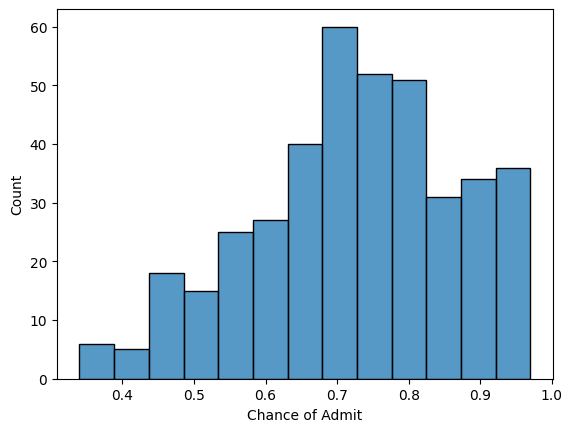

In [12]:
sns.histplot(x= df['Chance of Admit'])

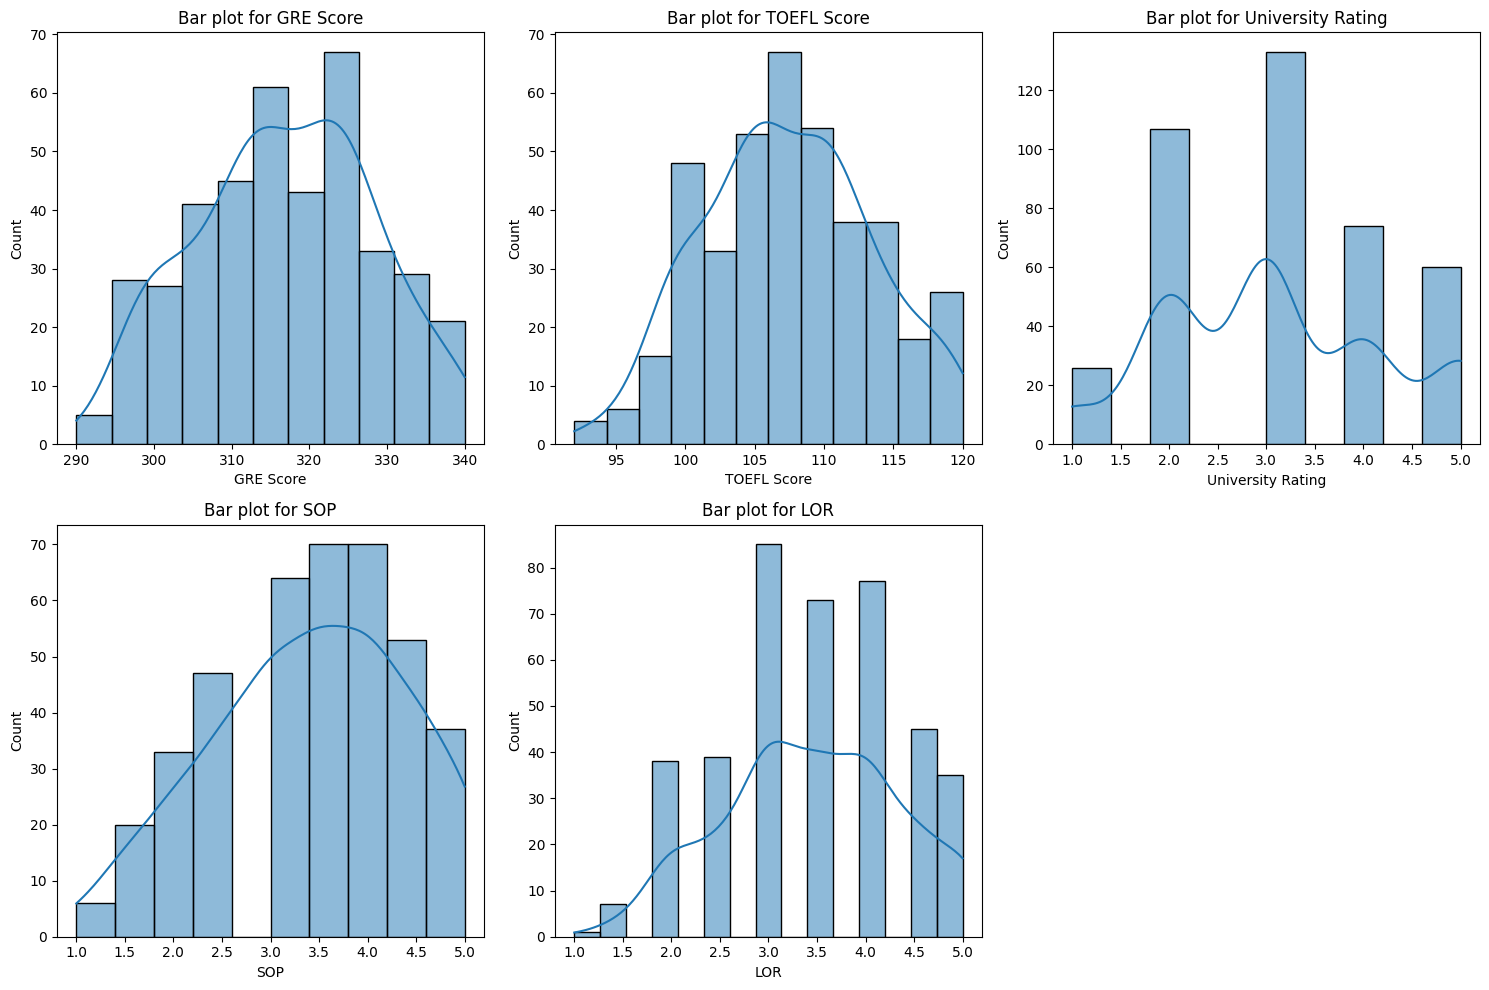

In [13]:
plt.figure(figsize=(15,10))

for i,column in enumerate(['GRE Score', 'TOEFL Score' ,'University Rating', 'SOP' , 'LOR'  ]):
    plt.subplot(2,3 ,i+1)
    sns.histplot( df[column], kde = True)
    plt.title(f"Bar plot for {column}")
plt.tight_layout()

<Axes: xlabel='Research', ylabel='count'>

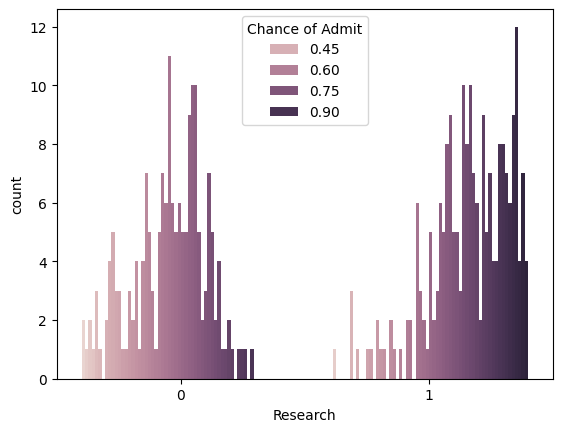

In [14]:
sns.countplot(x = df['Research'], hue = df['Chance of Admit'] )

<Axes: >

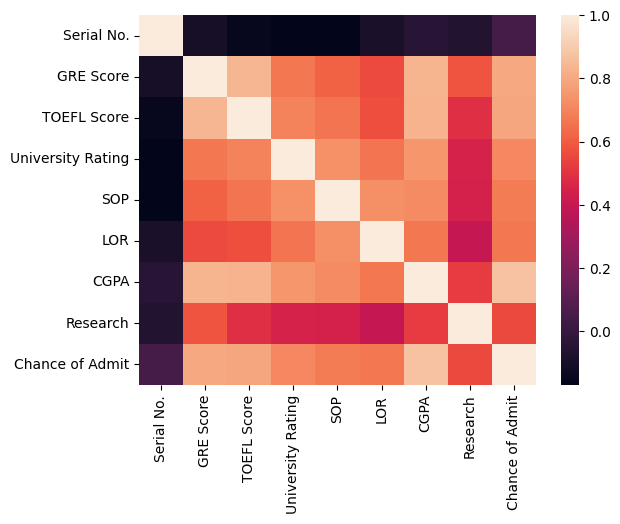

In [15]:
sns.heatmap(df.corr())

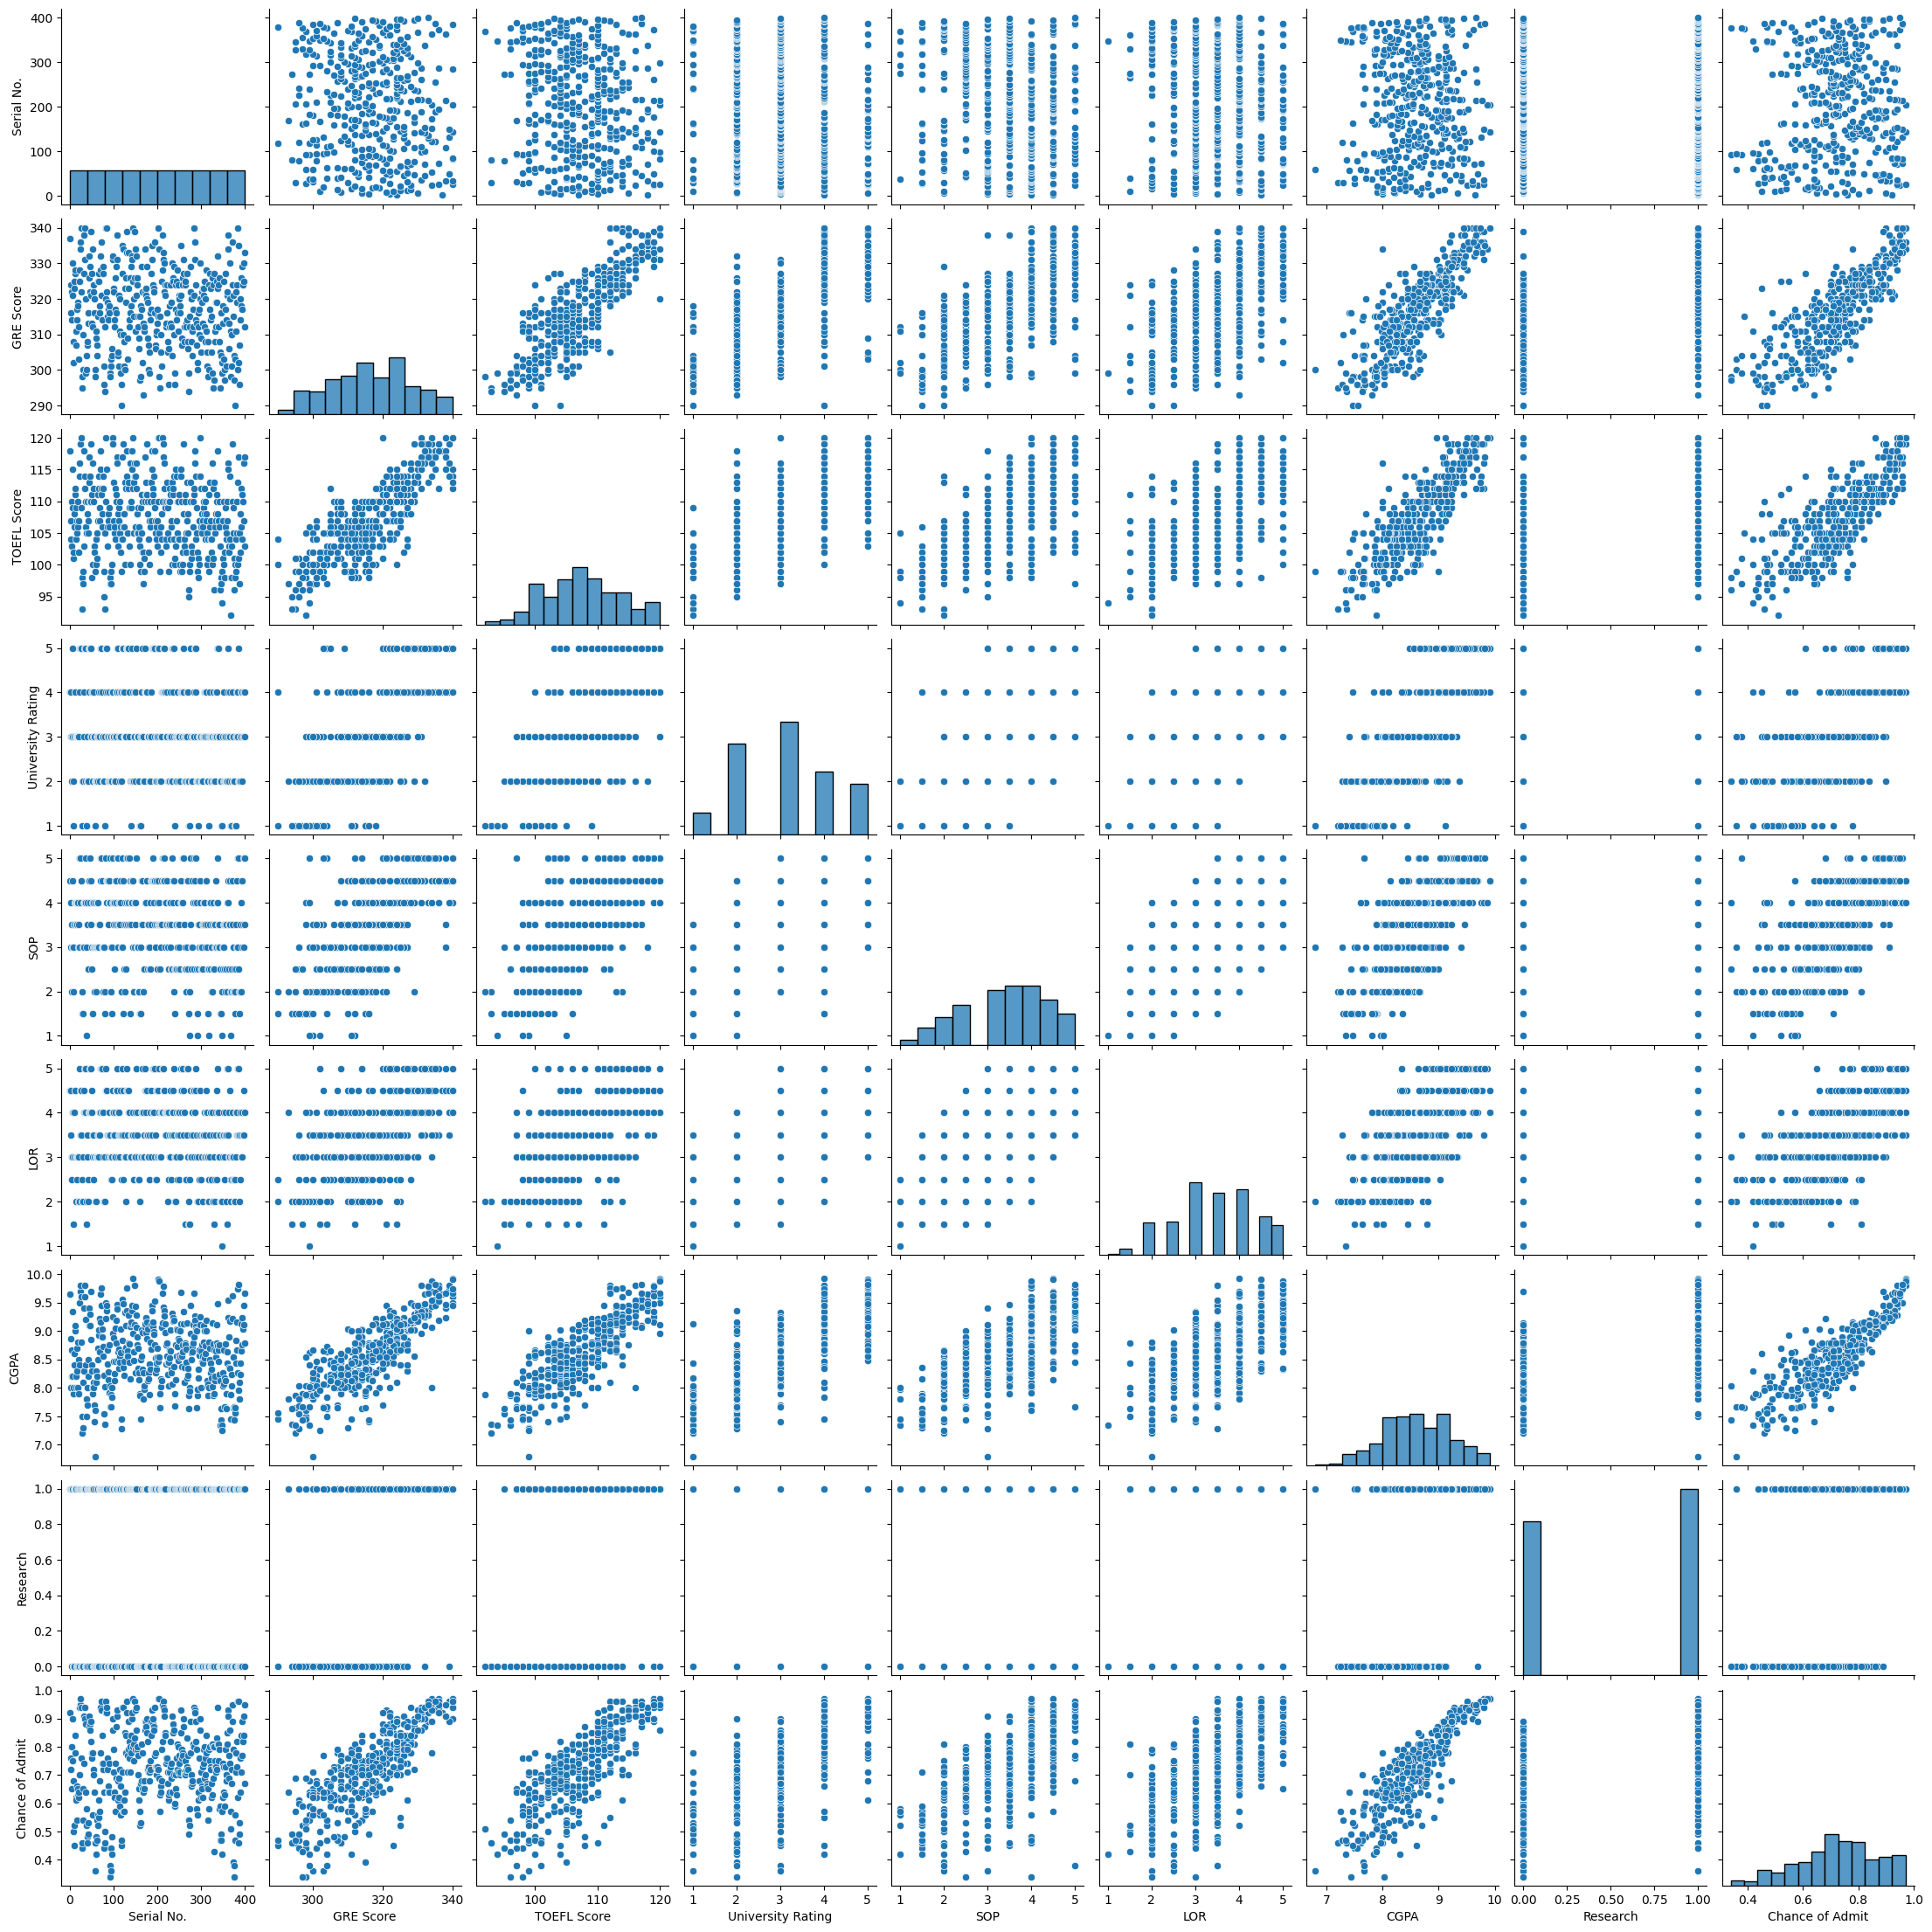

In [16]:
sns.pairplot(df)

In [17]:
df =df.drop('Serial No.', axis = 1)

In [18]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train

array([[0.2       , 0.28571429, 0.5       , ..., 0.625     , 0.46794872,
        0.        ],
       [1.        , 1.        , 0.75      , ..., 0.75      , 1.        ,
        1.        ],
       [0.48      , 0.39285714, 0.25      , ..., 0.5       , 0.45192308,
        0.        ],
       ...,
       [0.72      , 0.71428571, 0.5       , ..., 0.5       , 0.72115385,
        1.        ],
       [0.68      , 0.64285714, 0.75      , ..., 0.75      , 0.75320513,
        1.        ],
       [0.76      , 0.82142857, 0.75      , ..., 0.75      , 0.75641026,
        1.        ]])

In [23]:
X_train.shape

(320, 7)

In [24]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input
from keras.regularizers import l2
from keras.layers import Dropout, BatchNormalization

In [25]:
model = Sequential()
model.add(Input(shape=(7,)))
model.add(Dense(64, activation='relu',))
model.add(Dense(32, activation='relu', ))
model.add(Dense(1, activation= 'linear'))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile( loss = 'mean_squared_error', metrics= ['mse'], optimizer= 'Adam')

In [28]:
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.4213 - mse: 0.4213 - val_loss: 0.0936 - val_mse: 0.0936
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - 

In [29]:
Y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [30]:
from sklearn.metrics import r2_score
print(r2_score(Y_test, Y_pred))

0.838452387887304


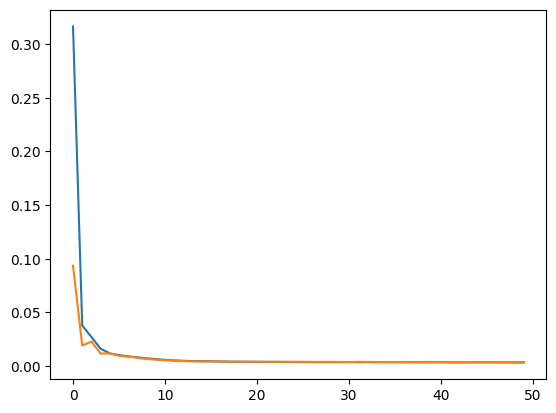

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

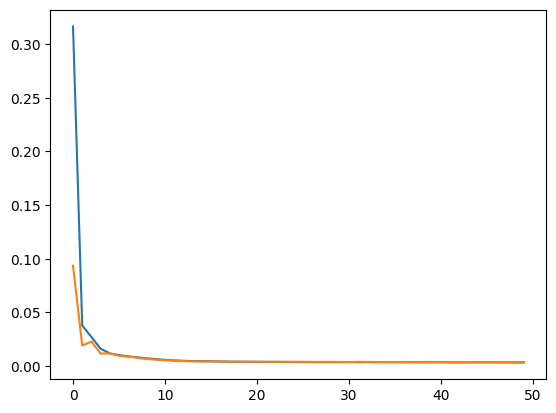

In [32]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

In [33]:
import pickle

In [35]:
with open("scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)

In [37]:
model.save('model.h5')